<a href="https://colab.research.google.com/github/HO94/InsightMining_HonGong/blob/main/09_2_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9C%BC%EB%A1%9C_IMDB_%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 리뷰 데이터셋

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


IMDB 리뷰 텍스트는 길이가 제각각  
고정 크기의 2차원 배열에 담기보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음

In [ ]:
# 첫 번째 리뷰의 길이
print(len(train_input[0]))

218


In [ ]:
# 두 번째 리뷰의 길이
print(len(train_input[1]))

189


In [ ]:
# 첫 번째 리뷰에 담긴 내용 확인하기
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


IMDB 리뷰 데이터는 이미 정수로 변환되어 있음  
num_words=500으로 지정했기 대문에 어휘 사전에는 500개의 단어만 들어가 있음  
어휘 사전에 없는 단어는 모두 2로 표시

In [ ]:
# 타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


리뷰가 긍정인지 부정인지를 판단  
이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)으로 나누어짐

In [ ]:
# 훈련 세트에서 검증 세트 분리
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
# 각 리뷰의 길이를 확인하기
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


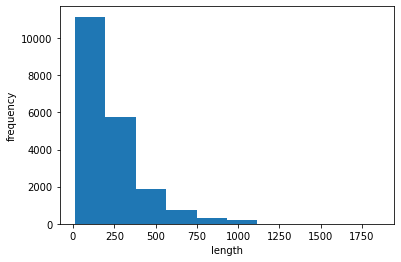

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
# pad_sequences() 함수를 통해 train_input의 길이를 100으로 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
# 패딩 결과 확인하기
print(train_input.shape) # 원래 데이터
print(train_seq.shape)   # 패딩 데이터

(20000,)
(20000, 100)


In [ ]:
# 첫 번째 데이터 출력
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
# 여섯 번째 데이터 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
# 검증 세트의 길이도 100으로 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

# 순환 신경망 만들기

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))  # 8 : 뉴런의 개수 / SimpleRNN 클래스의 activation의 기본값은 tanh
model.add(keras.layers.Dense(1, activation="sigmoid"))        

토큰을 정수로 변환한 데이터를 신경망에 주입하면 큰 정수가 큰 활성화 출력을 만듦  
20번 토큰을 10번 토큰보다 더 중요시해야할 이유가 없음  
정숫값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법은 원-핫 인코딩  
train_seq[0]의 첫 번째 토큰인 10을 원-핫 인코딩으로 바꾸면 열한 번째 원소만 1이고 나머지는 모두 0인 배열  
imdb.load_data() 함수에서 500개의 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 500개  
즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0(패딩 토큰)에서 499까지이기 때문에 배열의 길이가 500

In [ ]:
# to_categorical() 함수를 통해 자동으로 원-핫 인코딩
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
# 인코딩 확인
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [ ]:
# val_seq도 원-핫 인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


# 순환 신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.6942 - accuracy: 0.5210 - val_loss: 0.6843 - val_accuracy: 0.5610
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6676 - accuracy: 0.5945 - val_loss: 0.6562 - val_accuracy: 0.6144
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6392 - accuracy: 0.6488 - val_loss: 0.6317 - val_accuracy: 0.6534
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6126 - accuracy: 0.6842 - val_loss: 0.6058 - val_accuracy: 0.6908
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5882 - accuracy: 0.7117 - val_loss: 0.5843 - val_accuracy: 0.7136
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5673 - accuracy: 0.7307 - val_loss: 0.5655 - val_accuracy: 0.7280
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5496 - accuracy: 0.7437 - val_loss: 0.5506 - val_ac

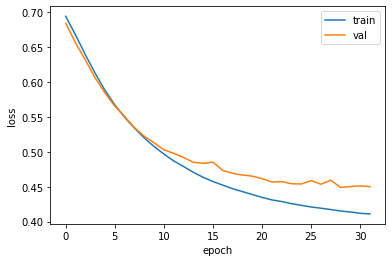

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


# 단어 임베딩을 사용하기

**단어 임베딩**<sup>word embedding</sup> : 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법

In [ ]:
# 단어 임베딩으로 순환 신경망 만들기
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100)) # 500 : 어휘 사전 크기 / 16 : 임베딩 벡터 크기 / input_lenght : 입력 시퀀스 길이
model2.add(keras.layers.SimpleRNN(8))                         # 8   : 뉴런 개수
model2.add(keras.layers.Dense(1, activation='sigmoid'))       # 1   : 뉴런 개수

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6954 - accuracy: 0.5150 - val_loss: 0.6769 - val_accuracy: 0.5908
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6469 - accuracy: 0.6614 - val_loss: 0.6308 - val_accuracy: 0.6872
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6142 - accuracy: 0.7200 - val_loss: 0.6059 - val_accuracy: 0.7242
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5905 - accuracy: 0.7469 - val_loss: 0.5895 - val_accuracy: 0.7378
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5710 - accuracy: 0.7610 - val_loss: 0.5689 - val_accuracy: 0.7640
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5525 - accuracy: 0.7739 - val_loss: 0.5532 - val_accuracy: 0.7630
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5351 - accuracy: 0.7819 - val_loss: 0.5400 - val_accuracy:

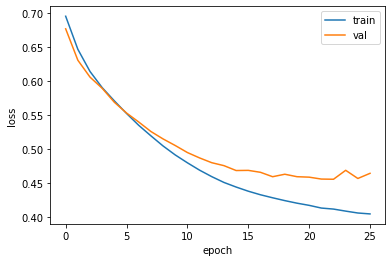

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()